## Introduction

## 0. Imports & variables

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
dataset_path = "./processed_data/photos/"

## 1. Chargement des données

In [4]:
nb_images = len(tf.io.gfile.glob(dataset_path+"*"))
print("Pattern matches {} images.".format(nb_images))

Pattern matches 29979 images.


In [5]:
def load_dataset_from_folder(folder):
    def decode_jpeg(filename):
        bits = tf.io.read_file(filename)
        image = tf.io.decode_jpeg(bits)
        return image

    dataset = tf.data.Dataset.list_files(folder+"*")
    return np.array(list(dataset.map(decode_jpeg, num_parallel_calls=tf.data.AUTOTUNE)))

In [6]:
# Charger les images
ds_images = load_dataset_from_folder(dataset_path)

## 2. Exploration des données

In [7]:
def display_random_images(ds_images, num_images=5, seed=42):
    """
    Displays random images from a TensorFlow dataset.
    
    Parameters:
    - ds_images: TensorFlow dataset containing image file paths.
    - num_images: Number of images to display.
    """

    np.random.seed(seed)
    sampled_images = np.random.choice(range(ds_images.shape[0]), num_images)
    
    # Display sampled images
    plt.figure(figsize=(15, 15))
    for i, img_index in enumerate(sampled_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(ds_images[img_index].astype("uint8"))
        plt.axis('off')
    plt.show()

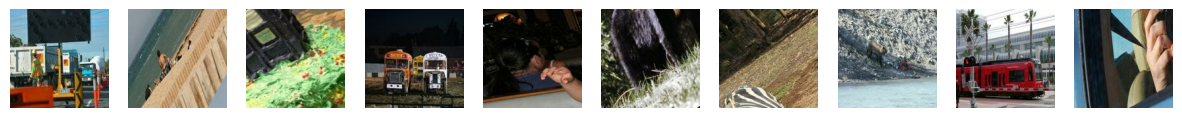

In [8]:
display_random_images(ds_images, 10)

## 3. Création du dataset noisy

In [17]:
def add_noise_to_images(images, mean=0, stddev=25):
    """
    Add Gaussian noise to an image.
    
    :param image: TensorFlow image tensor of shape (height, width, channels).
    :param mean: Mean of the Gaussian noise. Default is 0.
    :param stddev: Standard deviation of the Gaussian noise. Default is 25.
    :return: Image with added Gaussian noise.
    """
    noisy_images = np.array([])
    
    for image in tqdm(images):
        with tf.device('/GPU:0'):
            noise = tf.random.normal(shape=image.shape, mean=mean, stddev=stddev, dtype=tf.float32)
            noisy_image = image + np.array(noise)
    
            # Ensure values are within [0, 255] since image pixel values should be in this range
            noisy_image_clipped = tf.clip_by_value(noisy_image, 0, 255)
            noisy_images = np.append(noisy_images, noisy_image_clipped)
    
    return noisy_images

In [18]:
ds_noisy_images = add_noise_to_images(ds_images)

  0%|          | 0/29979 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
display_random_images(ds_images, 10)
display_random_images(ds_noisy_images, 10)

## 4. Création du modèle

## 5. Entraînement du modèle

## 6. Evaluation du modèle